In [106]:
import numpy as np
import sklearn 
import mlxtend 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy.stats import shapiro 
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder




In [108]:
df = pd.read_csv('ppi.csv', delimiter=',')

In [109]:
print(df.head())

   Unnamed: 0  domain  aa_ProtPosition  uniprot_id  Rlength sequence  \
0           0       0                1  A0A024RAV5      188        M   
1           1       0                2  A0A024RAV5      188        T   
2           2       0                3  A0A024RAV5      188        E   
3           3       0                4  A0A024RAV5      188        Y   
4           4       1                5  A0A024RAV5      188        K   

   normalized_length  normalized_abs_surf_acc  normalized_hydropathy_index  \
0           0.238095                 0.784319                     0.711111   
1           0.238095                 0.359207                     0.422222   
2           0.238095                 0.395387                     0.111111   
3           0.238095                 0.401655                     0.355556   
4           0.238095                 0.288103                     0.066667   

   rel_surf_acc  ...  9_wm_pssm_K  9_wm_pssm_M  9_wm_pssm_F  9_wm_pssm_P  \
0         0.803  ...  

In [112]:
#do PCA for intance 
#look at the feature importance 
#plot some of the data
#preprocessing

features_remove = ["uniprot_id", 'domain', 'p_interface','Rlength'] 

##Maybe use o	One-hot coding for the categorical featuresS
print("Original columns:", df.columns.tolist())
df = df.drop(features_remove, axis=1)
print('\n')
print("removed columns:", df.columns.tolist())

Original columns: ['Unnamed: 0', 'domain', 'aa_ProtPosition', 'uniprot_id', 'Rlength', 'sequence', 'normalized_length', 'normalized_abs_surf_acc', 'normalized_hydropathy_index', 'rel_surf_acc', 'prob_sheet', 'prob_helix', 'prob_coil', 'pssm_A', 'pssm_R', 'pssm_N', 'pssm_D', 'pssm_C', 'pssm_Q', 'pssm_E', 'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L', 'pssm_K', 'pssm_M', 'pssm_F', 'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W', 'pssm_Y', 'pssm_V', '3_wm_normalized_abs_surf_acc', '5_wm_normalized_abs_surf_acc', '7_wm_normalized_abs_surf_acc', '9_wm_normalized_abs_surf_acc', '3_wm_normalized_hydropathy_index', '5_wm_normalized_hydropathy_index', '7_wm_normalized_hydropathy_index', '9_wm_normalized_hydropathy_index', '3_wm_rel_surf_acc', '5_wm_rel_surf_acc', '7_wm_rel_surf_acc', '9_wm_rel_surf_acc', '3_wm_prob_sheet', '5_wm_prob_sheet', '7_wm_prob_sheet', '9_wm_prob_sheet', '3_wm_prob_helix', '5_wm_prob_helix', '7_wm_prob_helix', '9_wm_prob_helix', '3_wm_prob_coil', '5_wm_prob_coil', '7_wm_prob_coil', '9_

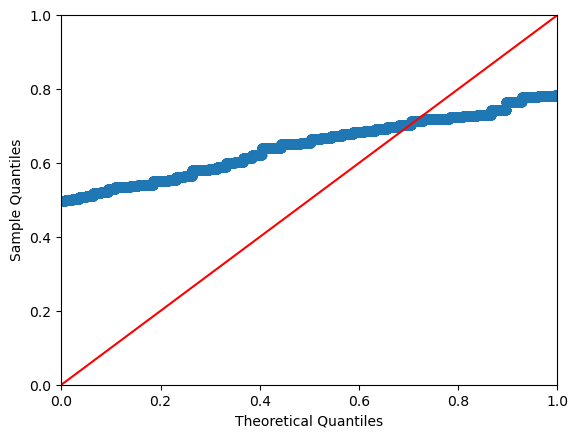

In [78]:
fig = sm.qqplot(df['normalized_length'], line='45')
plt.xlim(0, 1)  # Set x-axis limits
plt.ylim(0, 1)
plt.show()

C:\Users\youpz\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 65150.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9721817699642223, pvalue=3.023422799671515e-72)

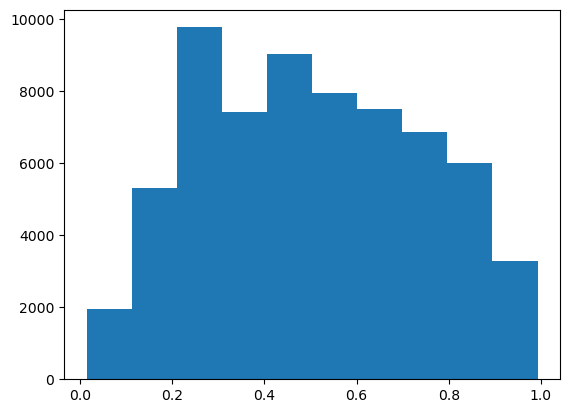

In [80]:
plt.hist(df['normalized_length'])
shapiro(df['normalized_length'])

In [118]:
# Using pandas' get_dummies
df['sequence']

df_pandas_encoded = pd.get_dummies(df, columns=['sequence'], drop_first=True)

# Using sklearn's OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Ensure output is a dense array

one_hot_encoded = encoder.fit_transform(df[['sequence']])  # Input should be 2D

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(['sequence']))

df_sklearn_encoded = pd.concat([df.drop('sequence', axis=1), one_hot_df], axis=1)

print("encoded columns:", df_sklearn_encoded.columns.tolist())

encoded columns: ['Unnamed: 0', 'aa_ProtPosition', 'normalized_length', 'normalized_abs_surf_acc', 'normalized_hydropathy_index', 'rel_surf_acc', 'prob_sheet', 'prob_helix', 'prob_coil', 'pssm_A', 'pssm_R', 'pssm_N', 'pssm_D', 'pssm_C', 'pssm_Q', 'pssm_E', 'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L', 'pssm_K', 'pssm_M', 'pssm_F', 'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W', 'pssm_Y', 'pssm_V', '3_wm_normalized_abs_surf_acc', '5_wm_normalized_abs_surf_acc', '7_wm_normalized_abs_surf_acc', '9_wm_normalized_abs_surf_acc', '3_wm_normalized_hydropathy_index', '5_wm_normalized_hydropathy_index', '7_wm_normalized_hydropathy_index', '9_wm_normalized_hydropathy_index', '3_wm_rel_surf_acc', '5_wm_rel_surf_acc', '7_wm_rel_surf_acc', '9_wm_rel_surf_acc', '3_wm_prob_sheet', '5_wm_prob_sheet', '7_wm_prob_sheet', '9_wm_prob_sheet', '3_wm_prob_helix', '5_wm_prob_helix', '7_wm_prob_helix', '9_wm_prob_helix', '3_wm_prob_coil', '5_wm_prob_coil', '7_wm_prob_coil', '9_wm_prob_coil', '3_wm_pssm_A', '3_wm_pssm_R', '3_

In [128]:


#scaling and mean centering
scaler = StandardScaler().fit(df_sklearn_encoded)
df = scaler.transform(df_sklearn_encoded)

plt.hist(df['normalized_length'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [122]:
pca = PCA(n_components=10)

pca.fit(df)
pca_results = pca.fit_transform(df)

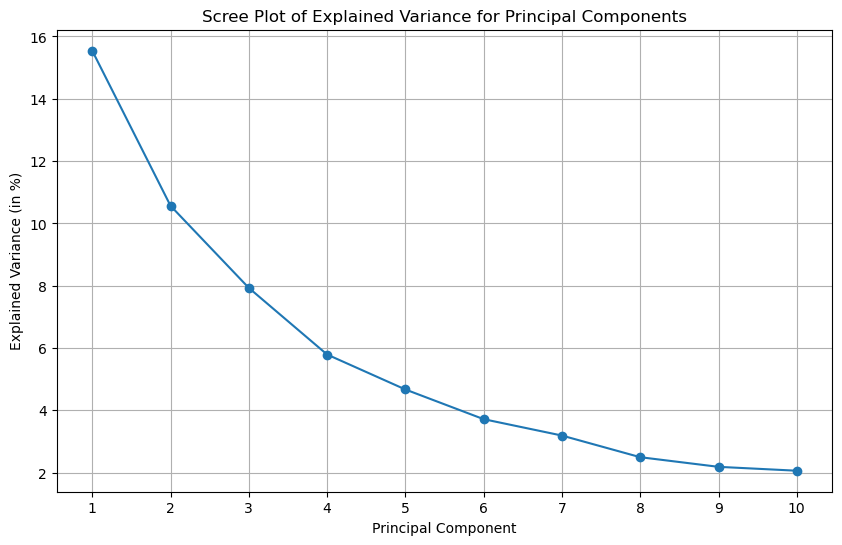

In [124]:
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'index'

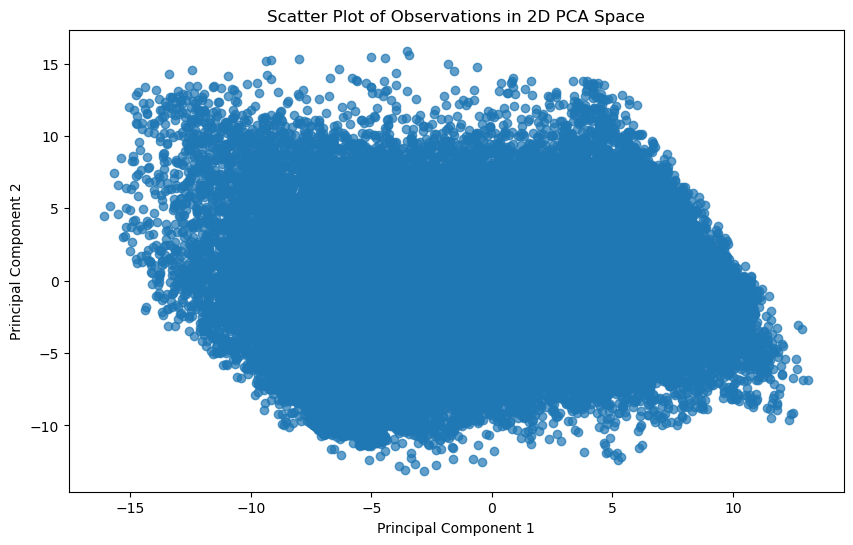

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], # position on the first principal component of the observations
            pca_results[:, 1], alpha=0.7) # position on the second principal component of the observations

# Add title and axis label
plt.title('Scatter Plot of Observations in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# (optionally) Add labels to each point based on their index in the original dataframe
for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]), fontsize=8)
    # This might be useful when doing outlier detection

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()